In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime as dt

### Task 1: Merge the 12 months of data into a single CSV 

In [2]:
os.getcwd()

'C:\\Users\\nycja\\OneDrive\\Desktop\\Python\\Sales Project\\Sales_Analysis'

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") #./ gets current directory, see one file to get an idea how it looks

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#to list all files in directory, make sure it's all there
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
#now, merge the files into one file
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

In [7]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
#to check if merging worked, write it to another csv
all_months_data.to_csv("all_data.csv", index=False)

In [9]:
#read in all_data
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_data.shape

(186850, 6)

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


### Task 2: Clean data (NaN values)

In [12]:
#check if there's NaN
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.shape)
print(nan_df.head())

(545, 6)
     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN


In [13]:
#get rid of NaN
all_data = all_data.dropna(how = 'all') #if all values are NaN, drop that row/column
all_data[all_data.isna().any(axis=1)] #check, no more NaN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Task 3: Add a 'Month' column

In [14]:
#when trying to convert Month to integer, we see another error - "Or" in 'Order Date' column 
Or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
Or_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
#Looks like we need to clean the data more
#we'll just filter it out
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
#Add month column and change it to an integer
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 4: Add 'Sales' column

In [17]:
#using pd.to_numeric
#convert columns to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.info() #check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [18]:
#now, we can create sales = quantity ordered * price
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Exploring data 

### Question 1: What was the best month for sales? How much was earned in that month?

In [19]:
pd.set_option('display.float_format', lambda x: '%i' % x) #set scentific notation to integer
sales_by_month = all_data.groupby('Month')[['Quantity Ordered', 'Sales']].sum()
sales_by_month

,Quantity Ordered,Sales
Month,,
1,10903,1822256
2,13449,2202022
3,17005,2807100
4,20558,3390670
5,18667,3152606
6,15253,2577802
7,16072,2647775
8,13448,2244467
9,13109,2097560


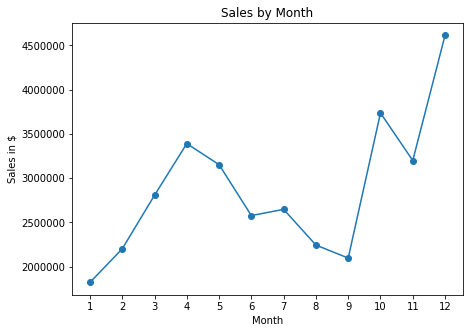

In [20]:
#Sales by Month graph
plt.figure(figsize = (7,5))
plt.plot(sales_by_month.index, sales_by_month['Sales'], marker = 'o')
plt.xticks(sales_by_month.index) #setting ticks to show all months
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales in $')
plt.show()

### Question 2: What city had the highest number of sales?

#### Splitting the 'Purchase Address' column to create 'City' and 'State' column

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23
2,176559,Bose SoundSport Headphones,1,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600
4,176560,Wired Headphones,1,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11
5,176561,Wired Headphones,1,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11


In [22]:
#city split
def get_city(address):
    return address.split(',')[1]

#state split
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})") 

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA)
4,176560,Wired Headphones,1,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA)
5,176561,Wired Headphones,1,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA)


In [24]:
sales_by_city = all_data.groupby('City')[['Quantity Ordered', 'Sales']].sum()
sales_by_city

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498
Austin (TX),11153,1819581
Boston (MA),22528,3661642
Dallas (TX),16730,2767975
Los Angeles (CA),33289,5452570
New York City (NY),27932,4664317
Portland (ME),2750,449758
Portland (OR),11303,1870732
San Francisco (CA),50239,8262203


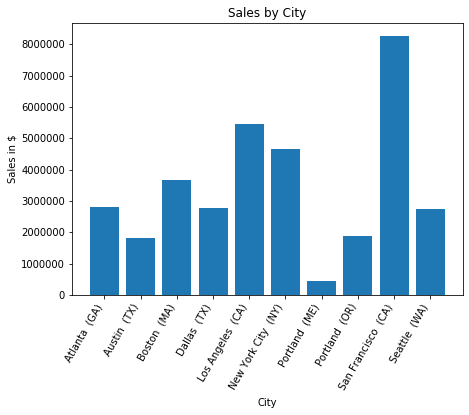

In [25]:
#Sales by city graph
plt.figure(figsize = (7,5))
plt.bar(sales_by_city.index, sales_by_city.Sales)
plt.xticks(rotation = 60 ,ha = 'right')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales in $')
plt.show()

### Question 3: What time should we display advertisments to maximize the likelihood of customer's buying product?

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
Sales               185950 non-null float64
City                185950 non-null object
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 13.5+ MB


#### Convert 'Order Date' column to datetime object

In [27]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Add a 'Hour' column 

In [28]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27


In [30]:
#count number of orders per hour
sales_by_hour = all_data.groupby('Hour')['Quantity Ordered'].count()
sales_by_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

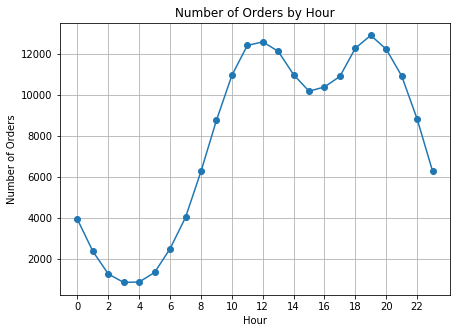

In [31]:
plt.figure(figsize = (7,5))
plt.plot(sales_by_hour.index, sales_by_hour, marker = 'o')
plt.xticks(np.arange(0,23,2))
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.grid()

We can see that most orders happen at around noon or 8-9pm. 
People may shop during their lunch time or at night time when they're relaxing at home.
Put ads right before the peaks. Recommend 10am-12pm and 7-8pm.

### Question 4: What products are often sold together?

In [32]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11,Boston (MA),14,5


In [33]:
duplicates = all_data[all_data['Order ID'].duplicated(keep = False)]
duplicates.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99,Boston (MA),11,31


In [34]:
duplicates['Grouped Products'] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicates.head()

C:\Users\nycja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Products
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600,Los Angeles (CA),19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11,Los Angeles (CA),19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [36]:
duplicates = duplicates[['Order ID', 'Grouped Products']].drop_duplicates()
duplicates

,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [37]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicates['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [38]:
count

Counter({('Google Phone', ' Wired Headphones'): 414,
         ('Google Phone', ' USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', ' Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', ' Google Phone'): 11,
         ('Lightning Charging Cable', ' USB-C Charging Cable'): 55,
         ('Apple Airpods Headphones', ' ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', ' AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', ' Google Phone'): 2,
         ('iPhone', ' Lightning Charging Cable'): 1005,
         ('Google Phone', ' Bose SoundSport Headphones'): 220,
         (' Bose SoundSport Headphones', ' Wired Headphones'): 29,
         ('AAA Batteries (4-pack)', ' 27in FHD Monitor'): 22,
         ('USB-C Charging Cable', ' AAA Batteries (4-pack)'): 42,
         ('iPhone', ' Wired Headphones'): 447,
         ('iPhone', ' 27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', ' AAA Batteries (4-pack)'): 16,
         ('iPhone', ' Ap

In [39]:
count.most_common(10) 

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

In [40]:
#better readability 
for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### Question 5: What product sold the most? Why do you think it sold the most?

In [41]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11,Boston (MA),14,5


In [42]:
popular_products = all_data.groupby('Product')['Quantity Ordered'].sum()
popular_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Text(0.5, 1.0, 'Quantity Sold by Product')

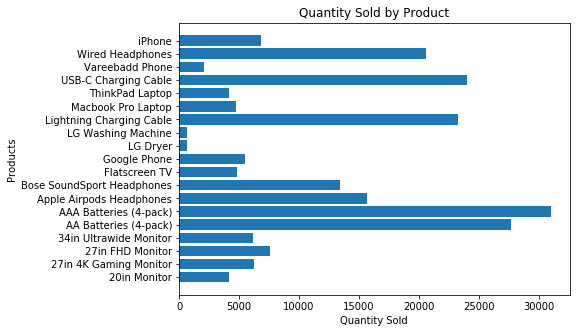

In [43]:
plt.figure(figsize = (7,5))
plt.barh(popular_products.index, popular_products)
plt.xticks()
plt.xlabel('Quantity Sold')
plt.ylabel('Products')
plt.title('Quantity Sold by Product')

It looks like the produts that are bought the most are also the cheapest (batteries).
Let's try to look at quantity sold by product and the prices for them.

In [44]:
prices = all_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                  109
27in 4K Gaming Monitor        389
27in FHD Monitor              149
34in Ultrawide Monitor        379
AA Batteries (4-pack)           3
AAA Batteries (4-pack)          2
Apple Airpods Headphones      150
Bose SoundSport Headphones     99
Flatscreen TV                 300
Google Phone                  600
LG Dryer                      600
LG Washing Machine            600
Lightning Charging Cable       14
Macbook Pro Laptop           1700
ThinkPad Laptop               999
USB-C Charging Cable           11
Vareebadd Phone               400
Wired Headphones               11
iPhone                        700
Name: Price Each, dtype: float64

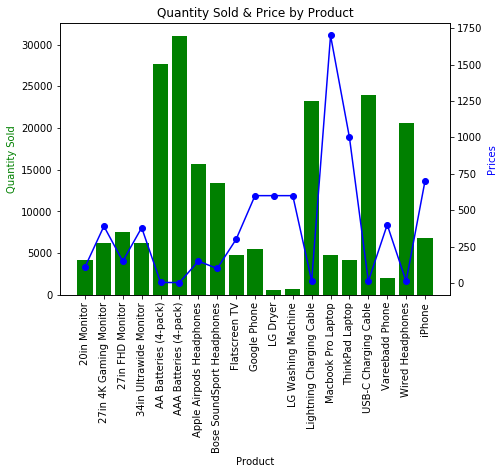

In [45]:
fig = plt.figure(figsize = (7,5))
ax1 = fig.subplots()
ax2 = ax1.twinx()
ax1.bar(popular_products.index, popular_products, color = 'g')
ax2.plot(prices.index, prices, color = 'b', marker = 'o')

plt.title('Quantity Sold & Price by Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color = 'g')
ax2.set_ylabel('Prices', color = 'b')
ax1.set_xticklabels(popular_products.index, rotation = 90)
plt.show()

From the graph below, it's not always the case that cheaper items are bought the most or that expensive items are bought the least. Dryers and washing machines are bought the least (long life span) but are not the most expensive. Laptops are most expensive but also bought at a moderate quantity because of high demand (new college students each year) and relatively low life span.

### Question 6: What products were being bought between the huge increase in Sept and Oct?

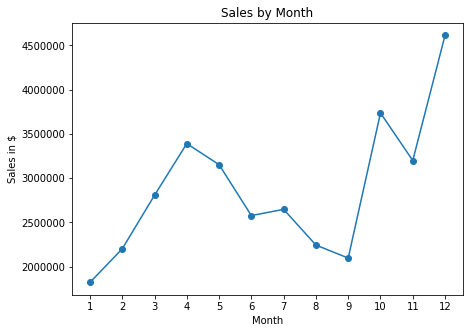

In [46]:
#Graph above shown here
plt.figure(figsize = (7,5))
plt.plot(sales_by_month.index, sales_by_month['Sales'], marker = 'o')
plt.xticks(sales_by_month.index) #setting ticks to show all months
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales in $')
plt.show()

We see a huge increase from Sept. to Oct. and Nov. to Dec. 
We can assume the increase between Nov and Dec. is due to the holidays.
Why the increase between Sept. to Oct.? Let's see if certain products were bought more than others. 

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27


In [48]:
sept = all_data[all_data['Month'] == 9]
october = all_data[all_data['Month'] == 10]

In [49]:
print(sept.shape)
print(october.shape)

(11621, 11)
(20282, 11)


In [50]:
sept.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
20634,238834,Apple Airpods Headphones,1,150,2019-09-01 04:13:00,"761 Forest St, San Francisco, CA 94016",9,150,San Francisco (CA),4,13
21114,239285,34in Ultrawide Monitor,1,379,2019-09-01 01:09:00,"373 1st St, San Francisco, CA 94016",9,379,San Francisco (CA),1,9
22507,240636,Lightning Charging Cable,1,14,2019-09-01 02:07:00,"63 1st St, Seattle, WA 98101",9,14,Seattle (WA),2,7
22952,241054,AAA Batteries (4-pack),1,2,2019-09-01 00:25:00,"175 South St, San Francisco, CA 94016",9,2,San Francisco (CA),0,25
24297,242343,ThinkPad Laptop,1,999,2019-09-01 02:44:00,"510 Park St, Boston, MA 02215",9,999,Boston (MA),2,44


In [51]:
#checking if duplicates exist
sept1 = sept[sept.duplicated(keep = False)]
sept1.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
175184,248171,USB-C Charging Cable,1,11,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11,New York City (NY),15,6
175185,248171,USB-C Charging Cable,1,11,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11,New York City (NY),15,6
175821,248787,AA Batteries (4-pack),1,3,2019-09-09 12:30:00,"705 Adams St, San Francisco, CA 94016",9,3,San Francisco (CA),12,30
175822,248787,AA Batteries (4-pack),1,3,2019-09-09 12:30:00,"705 Adams St, San Francisco, CA 94016",9,3,San Francisco (CA),12,30
176985,249895,34in Ultrawide Monitor,1,379,2019-09-19 22:14:00,"901 South St, San Francisco, CA 94016",9,379,San Francisco (CA),22,14
176986,249895,34in Ultrawide Monitor,1,379,2019-09-19 22:14:00,"901 South St, San Francisco, CA 94016",9,379,San Francisco (CA),22,14
177002,249910,AAA Batteries (4-pack),1,2,2019-09-09 18:34:00,"295 Meadow St, San Francisco, CA 94016",9,2,San Francisco (CA),18,34
177003,249910,AAA Batteries (4-pack),1,2,2019-09-09 18:34:00,"295 Meadow St, San Francisco, CA 94016",9,2,San Francisco (CA),18,34
177276,250174,Apple Airpods Headphones,1,150,2019-09-30 19:32:00,"490 6th St, New York City, NY 10001",9,150,New York City (NY),19,32
177277,250174,Apple Airpods Headphones,1,150,2019-09-30 19:32:00,"490 6th St, New York City, NY 10001",9,150,New York City (NY),19,32


In [52]:
sept2 = sept[sept['Order ID'].duplicated(keep = False)]
sept2.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
175184,248171,USB-C Charging Cable,1,11,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11,New York City (NY),15,6
175185,248171,USB-C Charging Cable,1,11,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11,New York City (NY),15,6
175224,248210,iPhone,1,700,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700,San Francisco (CA),10,33
175225,248210,Lightning Charging Cable,1,14,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14,San Francisco (CA),10,33
175234,248219,Bose SoundSport Headphones,1,99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99,Los Angeles (CA),12,48
175235,248219,Google Phone,1,600,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,600,Los Angeles (CA),12,48
175281,248265,Vareebadd Phone,1,400,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400,San Francisco (CA),14,7
175282,248265,Bose SoundSport Headphones,1,99,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,99,San Francisco (CA),14,7
175340,248323,Google Phone,1,600,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,600,Portland (OR),20,36
175341,248323,Bose SoundSport Headphones,1,99,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,99,Portland (OR),20,36


In [53]:
#So we see two things going on here. There are exact duplicates which we can maybe assume 
#they are double counts. Then there are duplicate order IDs with two different products, 
#which is fine. 

In [54]:
sept1.shape 
#There's only 36 rows. So let's drop these duplicates

(36, 11)

In [55]:
sept = sept.drop_duplicates()
sept.shape # half of 36 is 18. 11621 - 11603 = 18

(11603, 11)

In [56]:
#do the same for october
october1 = october[october.duplicated(keep = False)]
october1.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
155763,260286,AA Batteries (4-pack),1,3,2019-10-25 18:18:00,"529 River St, New York City, NY 10001",10,3,New York City (NY),18,18
155764,260286,AA Batteries (4-pack),1,3,2019-10-25 18:18:00,"529 River St, New York City, NY 10001",10,3,New York City (NY),18,18
156237,260739,AAA Batteries (4-pack),1,2,2019-10-09 23:06:00,"372 9th St, Seattle, WA 98101",10,2,Seattle (WA),23,6
156238,260739,AAA Batteries (4-pack),1,2,2019-10-09 23:06:00,"372 9th St, Seattle, WA 98101",10,2,Seattle (WA),23,6
157122,261586,AAA Batteries (4-pack),1,2,2019-10-11 20:03:00,"703 Main St, Los Angeles, CA 90001",10,2,Los Angeles (CA),20,3
157123,261586,AAA Batteries (4-pack),1,2,2019-10-11 20:03:00,"703 Main St, Los Angeles, CA 90001",10,2,Los Angeles (CA),20,3
157638,262078,Bose SoundSport Headphones,1,99,2019-10-01 15:22:00,"158 Cherry St, San Francisco, CA 94016",10,99,San Francisco (CA),15,22
157639,262078,Bose SoundSport Headphones,1,99,2019-10-01 15:22:00,"158 Cherry St, San Francisco, CA 94016",10,99,San Francisco (CA),15,22
158389,262792,27in 4K Gaming Monitor,1,389,2019-10-29 12:55:00,"536 Lakeview St, San Francisco, CA 94016",10,389,San Francisco (CA),12,55
158390,262792,27in 4K Gaming Monitor,1,389,2019-10-29 12:55:00,"536 Lakeview St, San Francisco, CA 94016",10,389,San Francisco (CA),12,55


In [57]:
october1.shape

(66, 11)

In [58]:
october2 = october[october['Order ID'].duplicated(keep = False)]
october2 #we see the same thing.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
154847,259420,Google Phone,1,600,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,600,Los Angeles (CA),8,54
154848,259420,USB-C Charging Cable,2,11,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",10,23,Los Angeles (CA),8,54
154850,259422,Google Phone,1,600,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,600,San Francisco (CA),4,53
154851,259422,USB-C Charging Cable,1,11,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",10,11,San Francisco (CA),4,53
154867,259438,iPhone,1,700,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",10,700,Los Angeles (CA),9,47
...,...,...,...,...,...,...,...,...,...,...,...
177238,250139,Google Phone,1,600,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",10,600,San Francisco (CA),0,53
177239,250139,USB-C Charging Cable,1,11,2019-10-01 00:53:00,"132 10th St, San Francisco, CA 94016",10,11,San Francisco (CA),0,53
182159,254858,iPhone,1,700,2019-10-01 01:39:00,"596 Adams St, New York City, NY 10001",10,700,New York City (NY),1,39
182160,254858,Lightning Charging Cable,1,14,2019-10-01 01:39:00,"596 Adams St, New York City, NY 10001",10,14,New York City (NY),1,39


In [59]:
october = october.drop_duplicates()
october.shape

(20249, 11)

In [60]:
october.shape #half of 66 is 33. 20282 - 20249 = 33

(20249, 11)

In [61]:
sept_products = sept.groupby('Product')['Quantity Ordered'].sum()
sept_products

Product
20in Monitor                   277
27in 4K Gaming Monitor         381
27in FHD Monitor               481
34in Ultrawide Monitor         378
AA Batteries (4-pack)         1770
AAA Batteries (4-pack)        1922
Apple Airpods Headphones       965
Bose SoundSport Headphones     828
Flatscreen TV                  294
Google Phone                   341
LG Dryer                        30
LG Washing Machine              46
Lightning Charging Cable      1428
Macbook Pro Laptop             287
ThinkPad Laptop                249
USB-C Charging Cable          1591
Vareebadd Phone                126
Wired Headphones              1300
iPhone                         397
Name: Quantity Ordered, dtype: int64

In [62]:
october_products = october.groupby('Product')['Quantity Ordered'].sum()
october_products

Product
20in Monitor                   428
27in 4K Gaming Monitor         722
27in FHD Monitor               789
34in Ultrawide Monitor         671
AA Batteries (4-pack)         2939
AAA Batteries (4-pack)        3357
Apple Airpods Headphones      1669
Bose SoundSport Headphones    1462
Flatscreen TV                  523
Google Phone                   597
LG Dryer                        50
LG Washing Machine              61
Lightning Charging Cable      2564
Macbook Pro Laptop             525
ThinkPad Laptop                461
USB-C Charging Cable          2662
Vareebadd Phone                203
Wired Headphones              2270
iPhone                         716
Name: Quantity Ordered, dtype: int64

In [63]:
diff = (october_products - sept_products)
diff

Product
20in Monitor                   151
27in 4K Gaming Monitor         341
27in FHD Monitor               308
34in Ultrawide Monitor         293
AA Batteries (4-pack)         1169
AAA Batteries (4-pack)        1435
Apple Airpods Headphones       704
Bose SoundSport Headphones     634
Flatscreen TV                  229
Google Phone                   256
LG Dryer                        20
LG Washing Machine              15
Lightning Charging Cable      1136
Macbook Pro Laptop             238
ThinkPad Laptop                212
USB-C Charging Cable          1071
Vareebadd Phone                 77
Wired Headphones               970
iPhone                         319
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity Ordered')

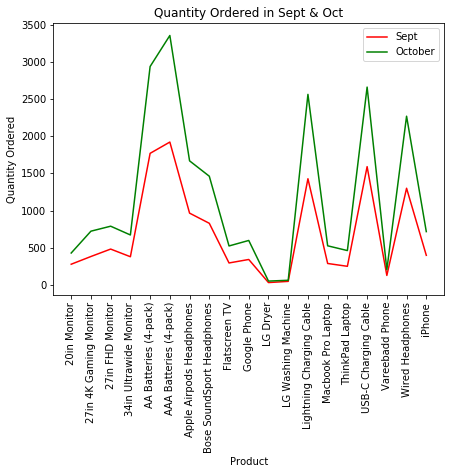

In [64]:
plt.figure(figsize = (7,5))
plt.plot(sept_products.index, sept_products, color = 'r')
plt.plot(october_products.index, october_products, color = 'g')
plt.xticks(rotation = 90)
plt.title('Quantity Ordered in Sept & Oct')
plt.legend(['Sept', 'October'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered') 

We can see from the graph that October had more orders in general across all products. No specific product was bought significantly more than another. Maybe there were holiday sales in Oct which increased orders in general. 